In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
pd.set_option('display.width', 2000)

In [3]:

nucleus_df = pd.read_csv('csv/nuclei.csv')

In [4]:


# Filter the dataframe to include only neurons with 'CellType' neunPositive or neunPositiveLow
neun_positive_df = nucleus_df[((nucleus_df['CellType'] == 'neunPositive') | (nucleus_df['CellType'] == 'neunPositiveLow')) & (nucleus_df['Location'] != 'Undefined')]

# Group the filtered data by 'Location', 'Condition', and 'ImageName' to count the number of neurons in each region for each image and condition
neuron_counts = neun_positive_df.groupby(['Location', 'Condition', 'ImageName']).size().reset_index(name='NeuronCount')
print(neuron_counts)



   Location Condition                                          ImageName  NeuronCount
0       CA1    Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...          635
1       CA1    Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          563
2       CA1    Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          726
3       CA1    Contra  HI 3 Contralateral Mouse 10 Slide18 G4green Ne...          674
4       CA1      Ipsi  HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...          476
5       CA1      Ipsi  HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...          372
6       CA1      Ipsi  HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...          537
7       CA1      Ipsi  HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...          516
8       CA1      Ipsi  HI 3 Ipsilateral Mouse 10 Slide18 G4green NeuN...          449
9       CA1      Ipsi  HI 3 Ipsilateral Mouse 10 Slide18 G4green NeuN...          435
10      CA1      Sham  Sham 1 Contralateral Mouse 6 Sl

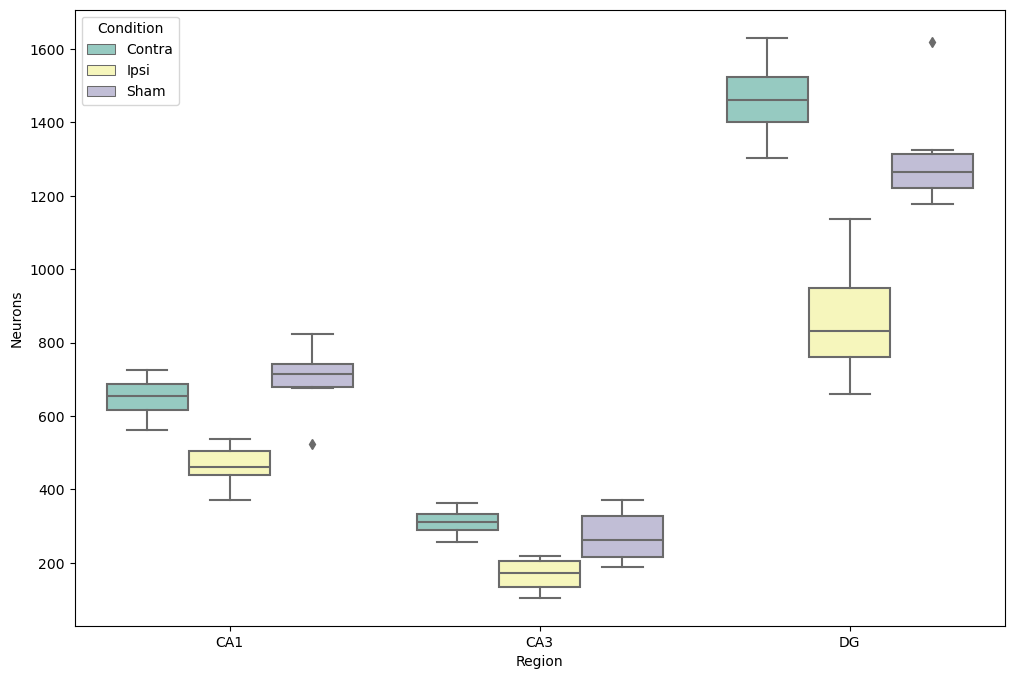

In [5]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='NeuronCount', hue='Condition', data=neuron_counts, palette='Set3')
plt.xlabel('Region')
plt.ylabel('Neurons')
plt.legend(title='Condition')
plt.show()

In [6]:
print(neuron_counts)

   Location Condition                                          ImageName  NeuronCount
0       CA1    Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...          635
1       CA1    Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          563
2       CA1    Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          726
3       CA1    Contra  HI 3 Contralateral Mouse 10 Slide18 G4green Ne...          674
4       CA1      Ipsi  HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...          476
5       CA1      Ipsi  HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...          372
6       CA1      Ipsi  HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...          537
7       CA1      Ipsi  HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...          516
8       CA1      Ipsi  HI 3 Ipsilateral Mouse 10 Slide18 G4green NeuN...          449
9       CA1      Ipsi  HI 3 Ipsilateral Mouse 10 Slide18 G4green NeuN...          435
10      CA1      Sham  Sham 1 Contralateral Mouse 6 Sl

C:\Users\jonasvg\AppData\Local\Temp\ipykernel_19448\699554064.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0006153  0.00056323 0.0005815  0.00055142 0.00048627 0.00038581
 0.0005878  0.00054817 0.0005279  0.00042274 0.00038029 0.00056347
 0.00052092 0.00059699 0.00051113 0.00044045]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_df.loc[merged_df['Location'] == 'CA1', 'NeuronDensity'] /= merged_df['CA1Volume']  # Divide by CA1Volume where Location is CA1
C:\Users\jonasvg\AppData\Local\Temp\ipykernel_19448\699554064.py:18: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x='Location', y='NeuronDensity', hue='Condition_x', hue_order=condition_order, dodge=True, data=merged_df, alpha=0.7, palette=palette)
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\l

   Location Condition_x                                          ImageName  NeuronCount Condition_y     CA1Volume     CA3Volume      DGVolume  Ch1Intensity  Ch2Intensity  Ch3Intensity  Ch4Intensity  NeuronDensity
0       CA1      Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...          635      Contra  1.032011e+06  1.015914e+06  1.194303e+06     12.385466      3.033560     24.824529      6.124181     615.303544
1       CA3      Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...          364      Contra  1.032011e+06  1.015914e+06  1.194303e+06     12.385466      3.033560     24.824529      6.124181     358.297897
2        DG      Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...         1631      Contra  1.032011e+06  1.015914e+06  1.194303e+06     12.385466      3.033560     24.824529      6.124181    1365.650472
3       CA1      Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          563      Contra  9.995970e+05  7.699031e+05  1.170954e+06      7

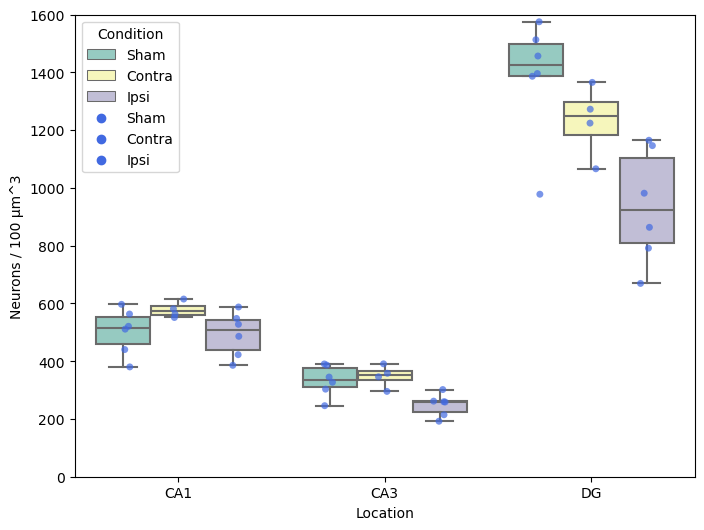

In [17]:
images_df = pd.read_csv("csv/images.csv")

merged_df = pd.merge(neuron_counts, images_df, on='ImageName')
palette = sns.color_palette(['royalblue'], 2)

merged_df['NeuronDensity'] = merged_df['NeuronCount']  # Initialize the column with Nuclei counts
merged_df.loc[merged_df['Location'] == 'CA1', 'NeuronDensity'] /= merged_df['CA1Volume']  # Divide by CA1Volume where Location is CA1
merged_df.loc[merged_df['Location'] == 'CA3', 'NeuronDensity'] /= merged_df['CA3Volume']  # Divide by CA3Volume where Location is CA3
merged_df.loc[merged_df['Location'] == 'DG', 'NeuronDensity'] /= merged_df['DGVolume']    # Divide by DGVolume where Location is DG
merged_df['NeuronDensity'] *= 10**6

condition_order = ['Sham', 'Contra', 'Ipsi']
print(merged_df)

# Create the figure
plt.figure(figsize=(8, 6))
sns.boxplot(x='Location', y='NeuronDensity', showfliers=False, hue='Condition_x', palette='Set3', hue_order=condition_order, data=merged_df)
sns.stripplot(x='Location', y='NeuronDensity', hue='Condition_x', hue_order=condition_order, dodge=True, data=merged_df, alpha=0.7, palette=palette)
plt.xlabel('Location')
plt.ylim(0,1600)
plt.ylabel('Neurons / 100 \u03bcm^3')
plt.legend(title='Condition')
plt.savefig("plots/total_neurons_region_volume.pdf")
plt.show()

In [13]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

anova_results = {}
tukey_results = {}

for location in merged_df['Location'].unique():
        type_data = [merged_df[(merged_df['Location'] == location) & (merged_df['Condition_x'] == condition) ]['NeuronDensity'] for condition in merged_df['Condition_x'].unique()]
        anova_results[location] = f_oneway(*type_data)
        
        print(f"ANOVA results for {location}: {anova_results[location]}")
        
        # Perform Tukey's HSD test for each class of neuron
        mc = MultiComparison(merged_df[(merged_df['Location'] == location)]['NeuronDensity'], merged_df[(merged_df['Location'] == location)]['Condition_x'])
        tukey_results[location] = mc.tukeyhsd()
        print(f"Tukey's HSD results for {location}:\n{tukey_results[location]}")


ANOVA results for CA1: F_onewayResult(statistic=1.9883233350435847, pvalue=0.17643891384308752)
Tukey's HSD results for CA1:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
Contra   Ipsi -84.7468 0.1858 -204.2341  34.7404  False
Contra   Sham -75.6536 0.2525 -195.1409  43.8337  False
  Ipsi   Sham   9.0932 0.9726  -97.7794 115.9659  False
-------------------------------------------------------
ANOVA results for CA3: F_onewayResult(statistic=7.541168027381371, pvalue=0.0066960051816704015)
Tukey's HSD results for CA3:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
Contra   Ipsi -99.5478 0.0128 -177.3431 -21.7525   True
Contra   Sham -14.5958 0.8747  -92.3911  63.1995  False
  Ipsi   Sham   84.952 0.0171   15.3697 154.5342   True
---------------------